In [18]:
## import pickle
import numpy as np
import matplotlib.pyplot as plt
from data.visualise import grid_psfs, show_psf_axial
from tifffile import imread
import pandas as pd
import seaborn as sns

def load_pickle_file(dpath):
    with open(dpath, 'rb') as f:
        return pickle.load(f)

# # MQ_data     
# stacks = '/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/beads_box15/combined/stacks.ome.tif'
# locs = '/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/beads_box15/combined/locs.hdf'
# exclude_idx = [5, 7, 11, 14, 22, 24, 26, 27, 28, 31, 32, 35, 37, 38, 40, 45, 50, 51, 54, 68, 69, 71, 72, 82, 87, 89, 91, 98, 102, 108, 109, 112, 113, 115, 116, 121, 122, 123, 127, 129, 131, 132, 133, 138, 141, 144, 150, 151, 154, 161, 167, 169, 170, 172, 178, 179, 181, 182, 184, 185, 186, 187, 190, 200, 201, 205, 206, 210, 214, 219, 221, 224, 226, 230, 233, 234, 235, 236, 237, 243]
# Z_STEP = 20

# FD-deeploc data
stacks = '/home/miguel/Projects/uni/data/smlm_3d/fd-deeploc-data/Astigmatism_beads_stacks_2um/combined/stacks.ome.tif'
locs = '/home/miguel/Projects/uni/data/smlm_3d/fd-deeploc-data/Astigmatism_beads_stacks_2um/combined/locs.hdf'
exclude_idx = []
Z_STEP = 50

all_psfs = imread(stacks)
all_locs = pd.read_hdf(locs, key='locs')

all_psfs = all_psfs[:, :, :, :, np.newaxis]

print(all_psfs.shape, all_psfs.dtype)

# # for i, psf in enumerate(psfs.sum(axis=-1)):
# #     plt.title(str(i))
# #     show_psf_axial(psf)


# # exclude_idx = [0, 5, 7, 12, 22, 26, 32, 35, 38, 40, 45, 50, 51, 54, 68, 69, 71, 72, 82, 87, 89, 91, 98, 102, 108, 109, 112, 113, 115, 116, 121, 122, 123, 124, 127, 129, 131, 132, 133, 138, 141, 144, 150, 151, 154, 161, 167, 169, 170, 172, 178, 179, 181, 182, 184, 185, 186, 187, 190, 200, 201, 205, 206, 210, 214, 219, 221, 224, 226, 230, 233, 234, 235, 236, 237, 243]

# # print('Excluded PSFs \n\n\n\n\n')
# # for i in exclude_idx:
# #     show_psf_axial(psfs[i].mean(axis=-1), str(i))
# #     plt.plot(psfs[i].max(axis=(1,2)))
# #     plt.show()
# # print('End of excluded PSFs \n\n\n\n\n')

# # print(psfs.shape[0])
# # for i in range(psfs.shape[0]):
# #     if i in exclude_idx:
# #         continue
# #     plt.title(str(i))
# #     show_psf_axial(psfs[i].mean(axis=-1))
# #     plt.plot(psfs[i].max(axis=(1,2,3)), label='max')
# #     plt.legend()
# #     plt.title(str(i))
# #     plt.show()

# idx = [i for i in range(psfs.shape[0]) if i not in exclude_idx]
# psfs = psfs[idx]
# locs = locs.iloc[idx]
all_locs['idx'] = np.arange(all_locs.shape[0])


(6259, 201, 15, 15, 1) uint16


In [19]:
# xlim = ((450, 750))
# ylim = ((450, 750))


xlim = ((810, 810+250))
ylim = ((790, 790+250))


idx = (xlim[0] < all_locs['x']) & (all_locs['x'] < xlim[1]) & (ylim[0] < all_locs['y']) & (all_locs['y'] < ylim[1])
locs = all_locs[idx]
psfs = all_psfs[locs['idx']]

print(psfs.shape)

ys = []
for i in range(psfs.shape[0]):
    y = np.arange(psfs.shape[1]) * Z_STEP
    y = y - 1000
    ys.append(y)
ys = np.stack(ys)

(155, 201, 15, 15, 1)


In [20]:
# exclude_idx = [35, 55, 60, 96, 104, 113, 128, 132, 230, 234]
exclude_idx = [0, 82, 109, 114, 138, 141, 149, 153]
# exclude_idx = []
idx = [i for i in range(psfs.shape[0]) if i not in exclude_idx]
psfs = psfs[idx]
locs = locs.iloc[idx]



0it [00:00, ?it/s]

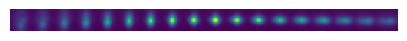

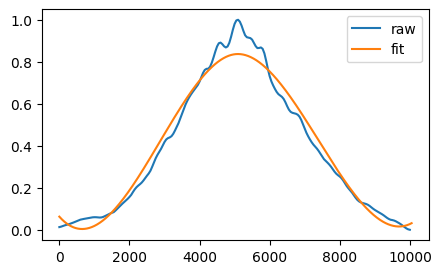

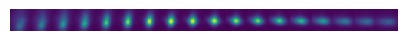

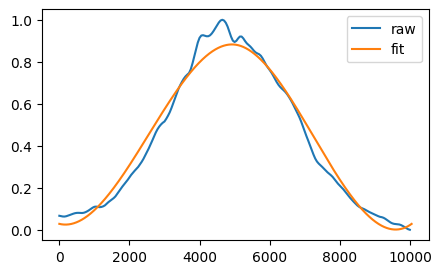



2it [00:00, 11.28it/s]

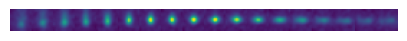

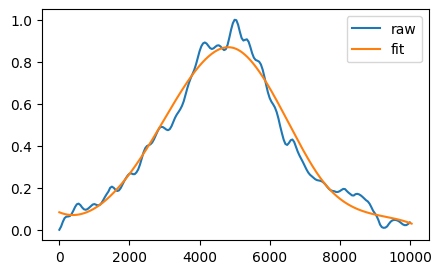

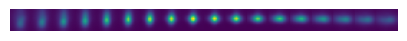

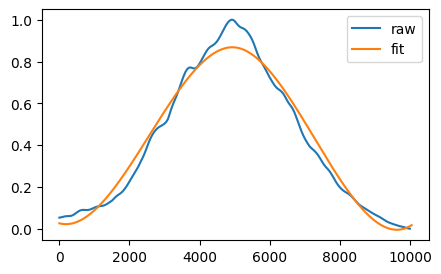



4it [00:00, 11.28it/s]

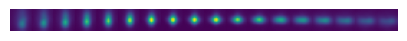

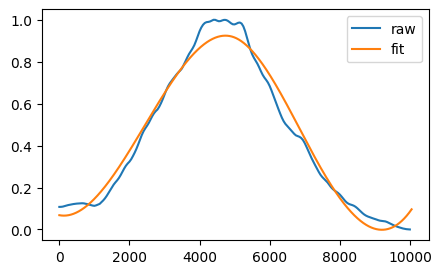

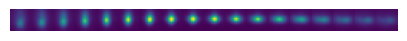

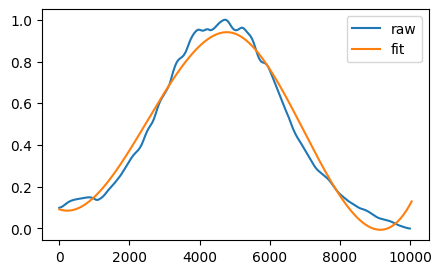



6it [00:00, 11.28it/s]

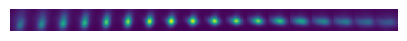

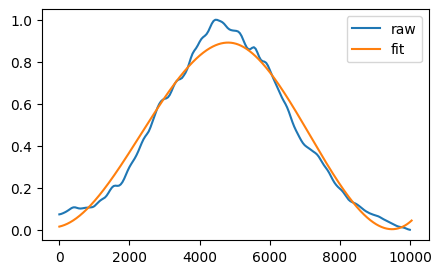

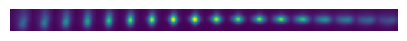

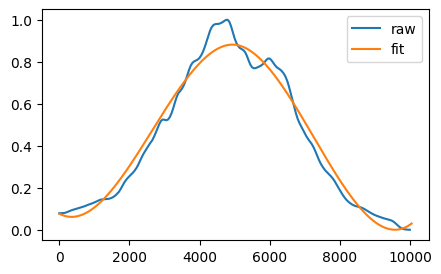



8it [00:00, 11.28it/s]

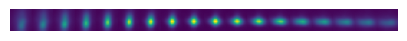

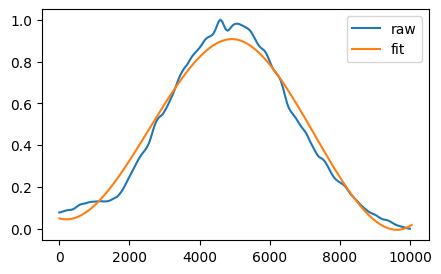

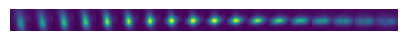

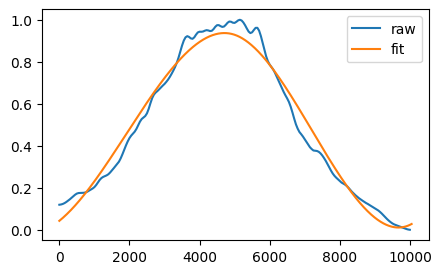



10it [00:00, 11.29it/s]

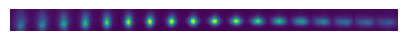

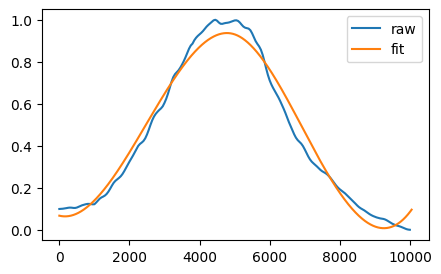

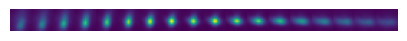

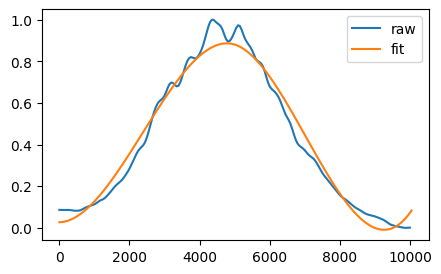



12it [00:01, 11.29it/s]

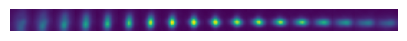

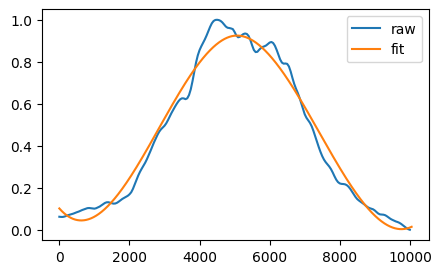

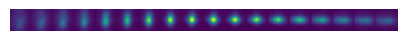

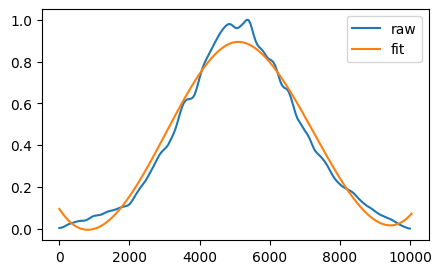



14it [00:01, 11.27it/s]

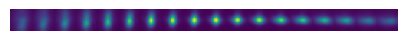

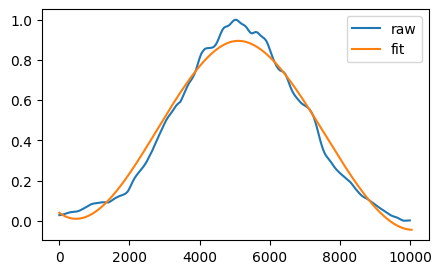

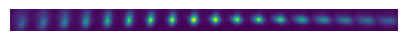

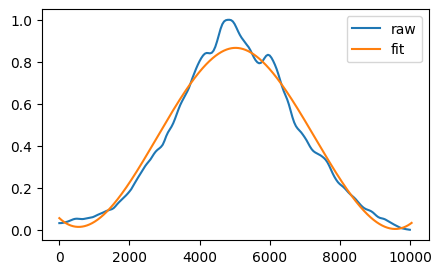



16it [00:01, 11.27it/s]

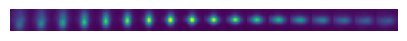

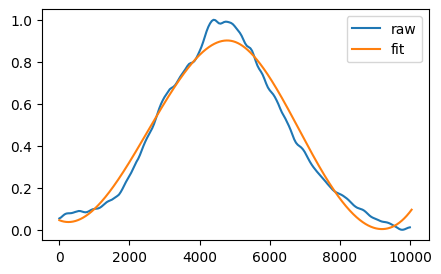

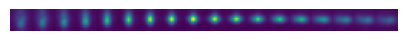

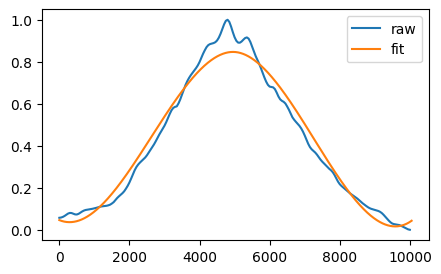



18it [00:01, 11.26it/s]

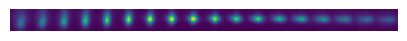

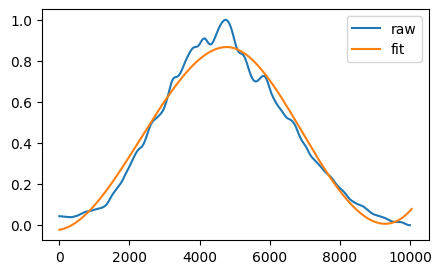

13it [04:56, 22.78s/it]


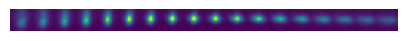

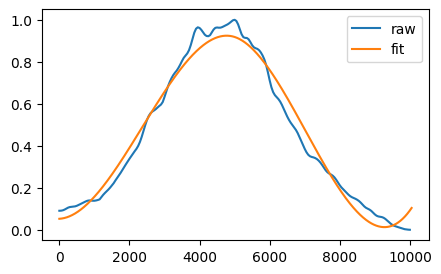



20it [00:01,  8.94it/s]

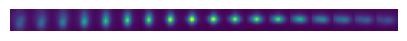

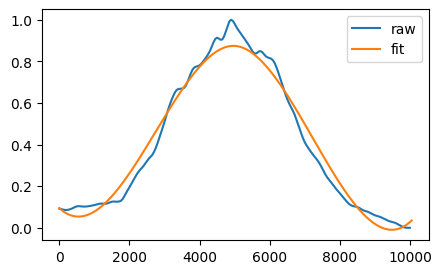

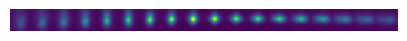

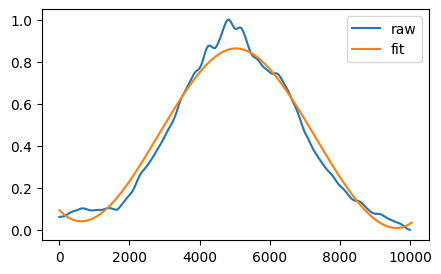



22it [00:02,  9.52it/s]

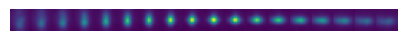

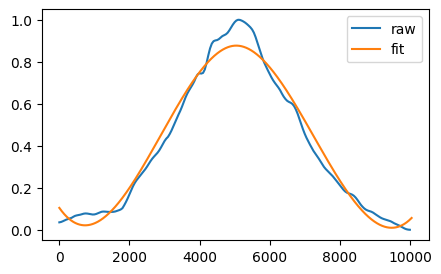

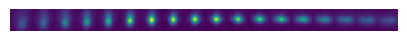

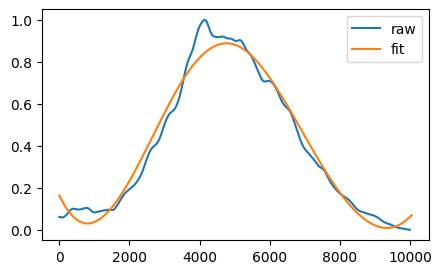



24it [00:02,  9.97it/s]

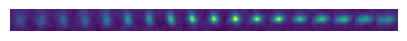

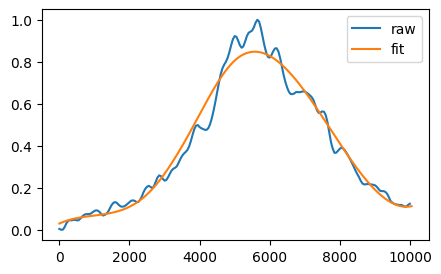

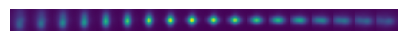

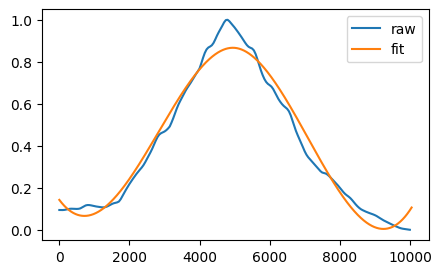



26it [00:02, 10.31it/s]

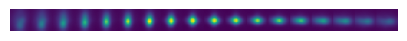

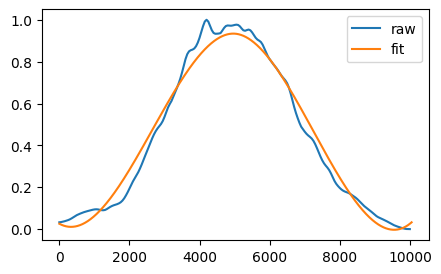

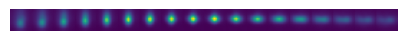

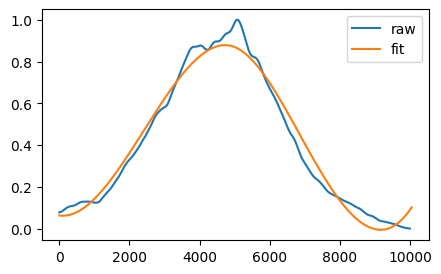



28it [00:02, 10.57it/s]

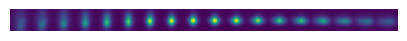

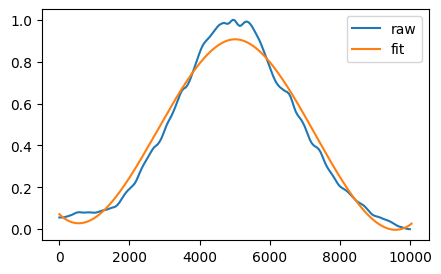

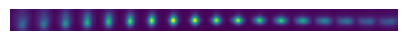

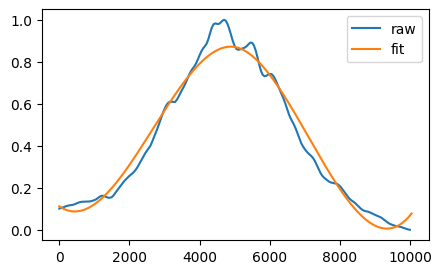



30it [00:02, 10.75it/s]

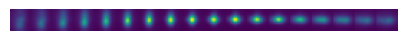

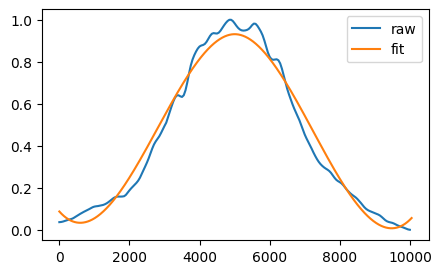

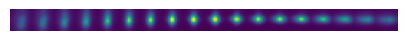

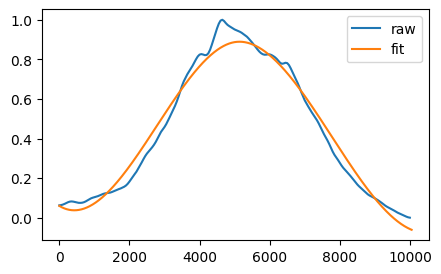



32it [00:02, 10.91it/s]

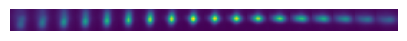

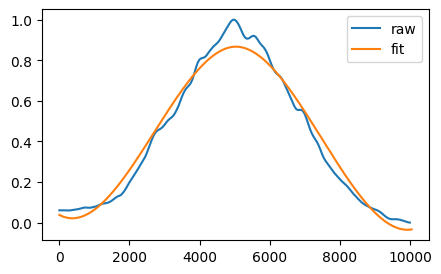

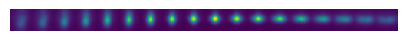

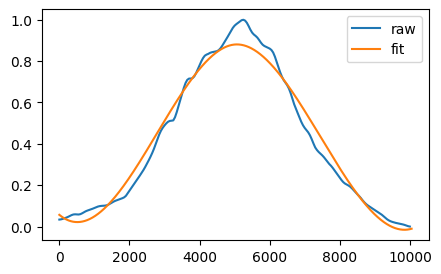



34it [00:03, 11.01it/s]

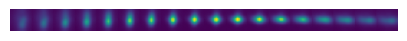

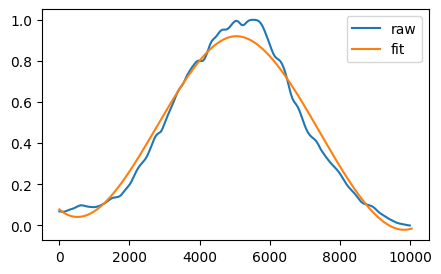

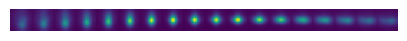

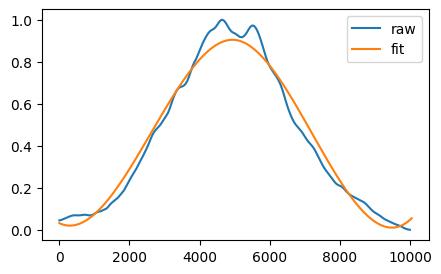



36it [00:03, 11.07it/s]

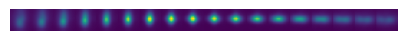

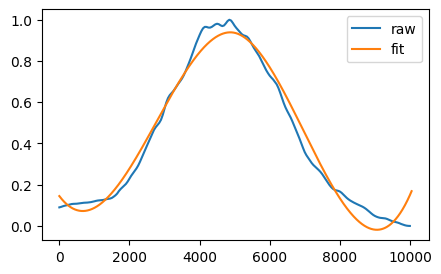

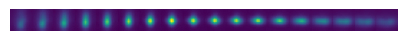

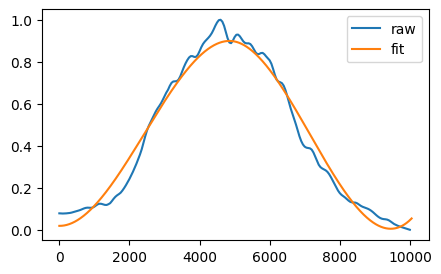



38it [00:03, 11.12it/s]

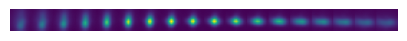

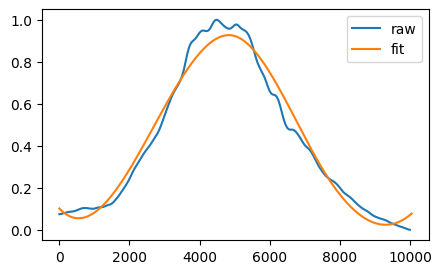

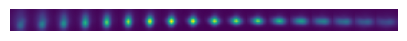

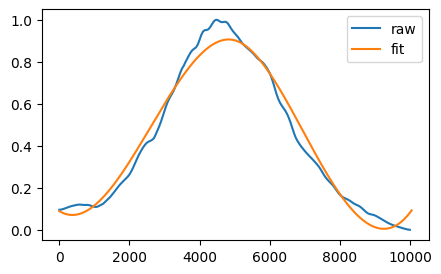



40it [00:03, 11.16it/s]

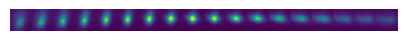

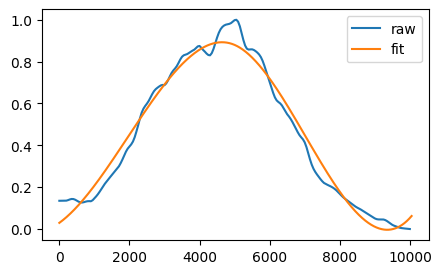

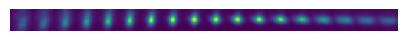

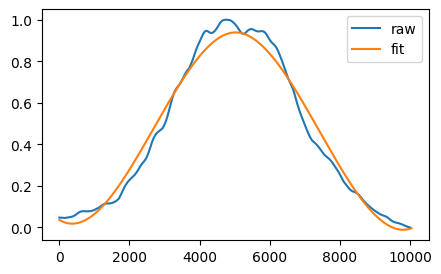



42it [00:03, 11.20it/s]

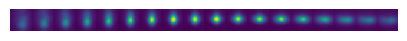

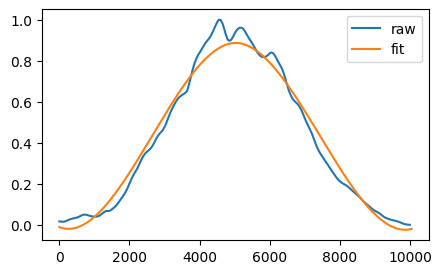

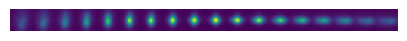

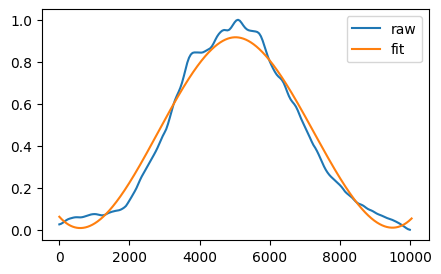



44it [00:04, 11.24it/s]

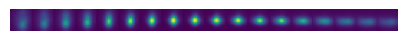

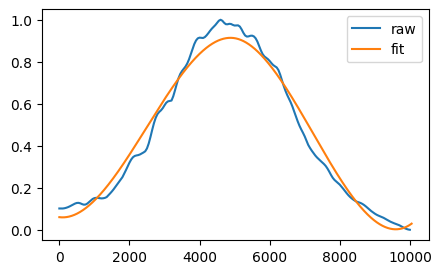

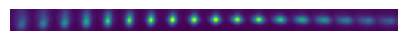

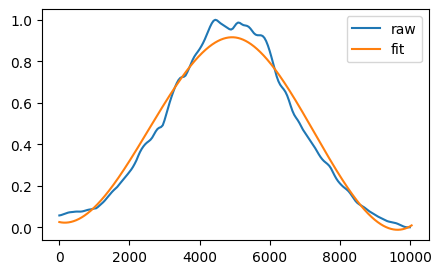



46it [00:04, 11.24it/s]

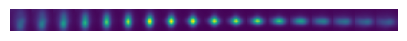

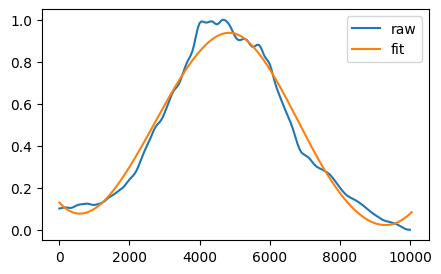

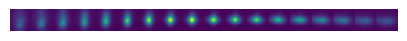

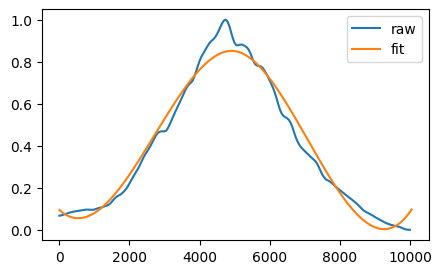



48it [00:04,  8.93it/s]

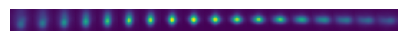

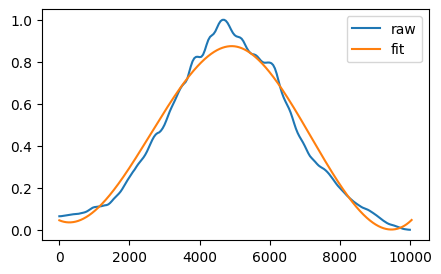

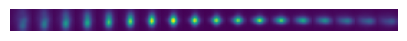

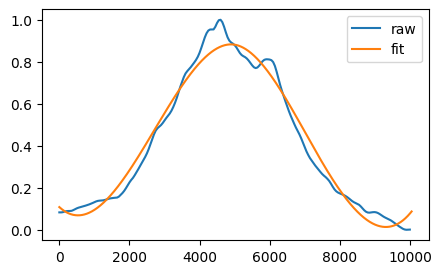



50it [00:04,  9.51it/s]

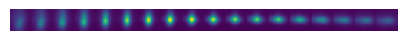

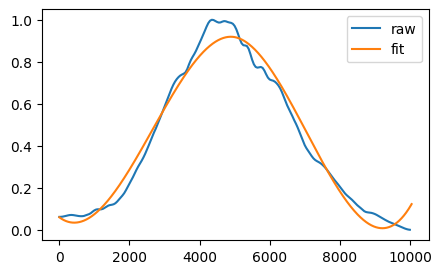

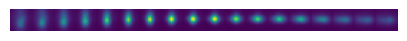

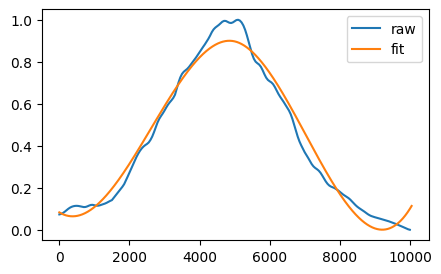



52it [00:04,  9.97it/s]

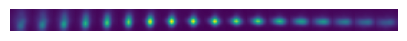

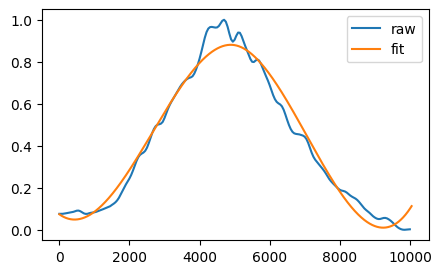

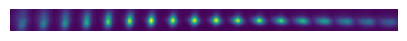

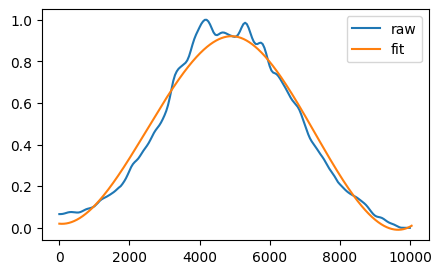



54it [00:05, 10.32it/s]

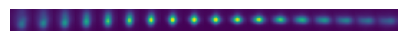

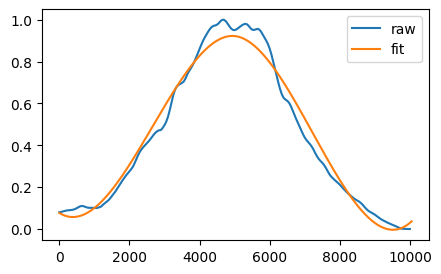

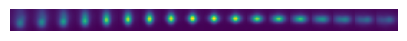

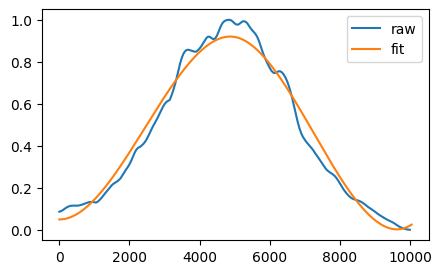



56it [00:05, 10.57it/s]

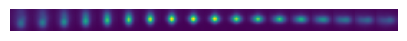

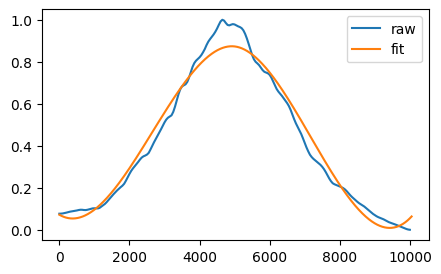

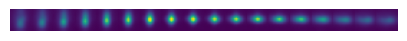

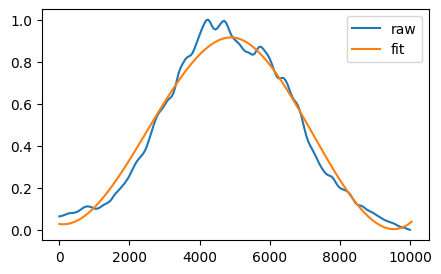



58it [00:05, 10.74it/s]

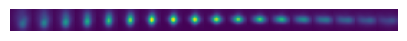

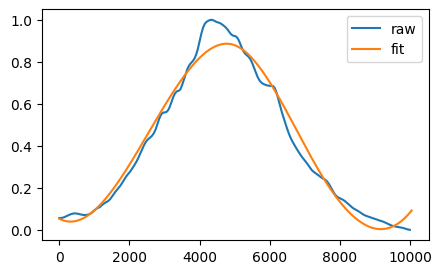

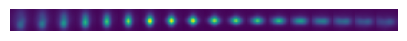

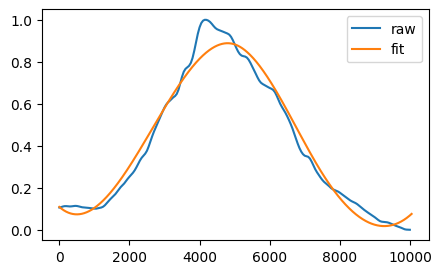



60it [00:05, 10.89it/s]

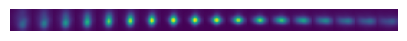

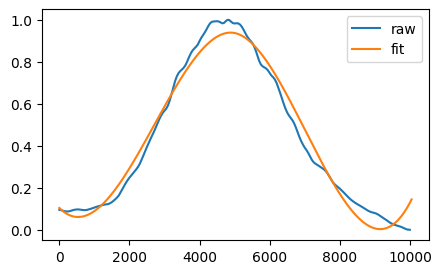

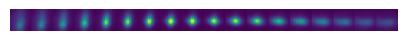

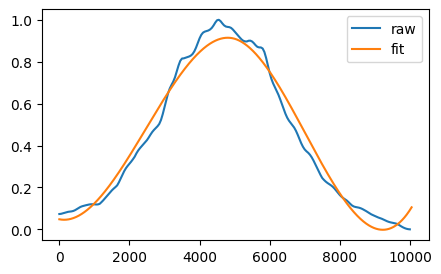



62it [00:05, 11.01it/s]

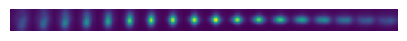

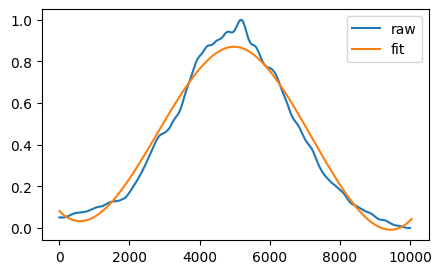

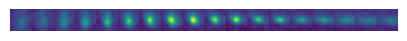

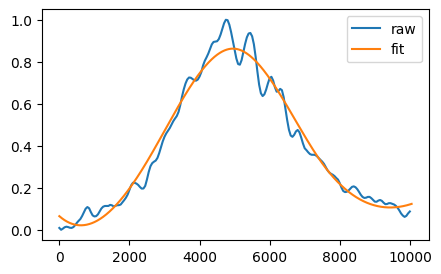



64it [00:05, 11.08it/s]

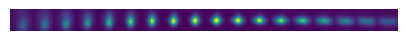

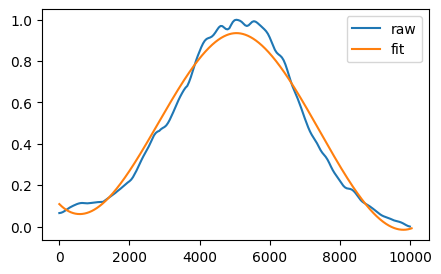

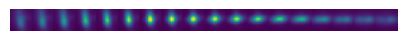

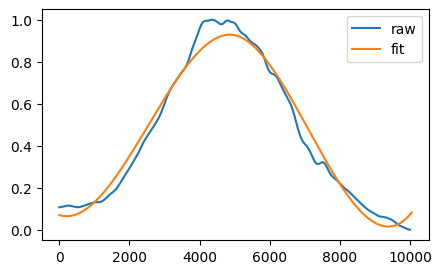



66it [00:06, 11.15it/s]

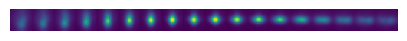

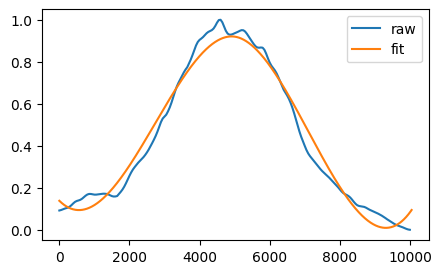

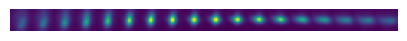

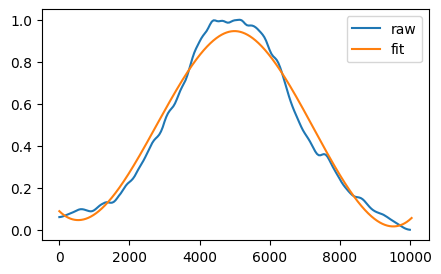



68it [00:06, 11.21it/s]

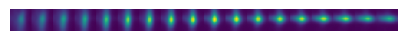

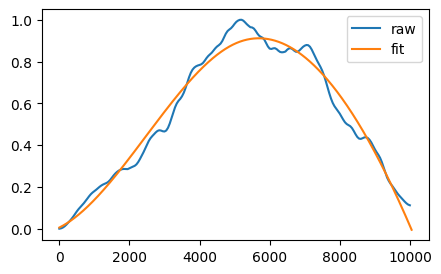

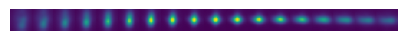

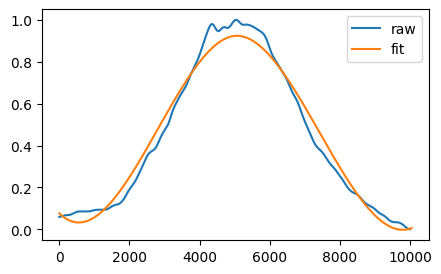



70it [00:06, 11.27it/s]

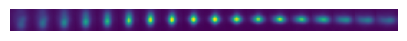

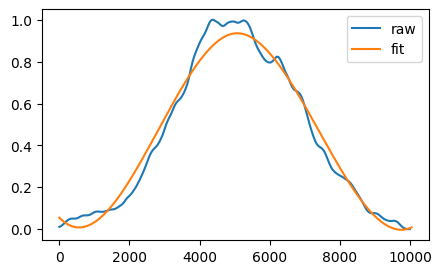

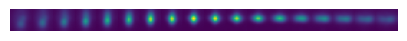

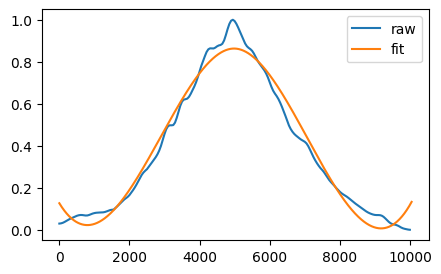



72it [00:06, 11.30it/s]

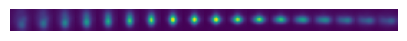

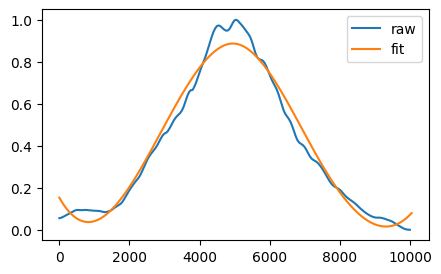

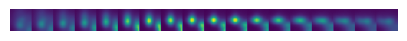

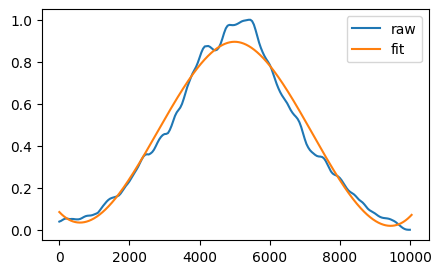



74it [00:06, 11.31it/s]

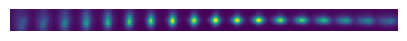

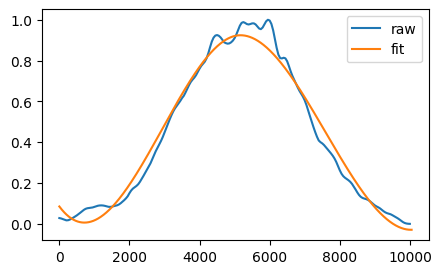

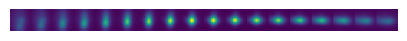

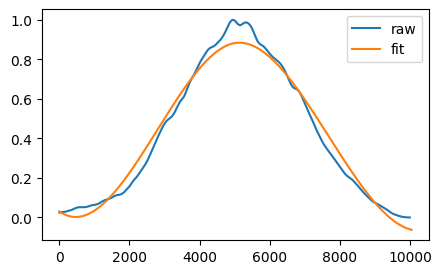



76it [00:07, 11.33it/s]

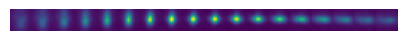

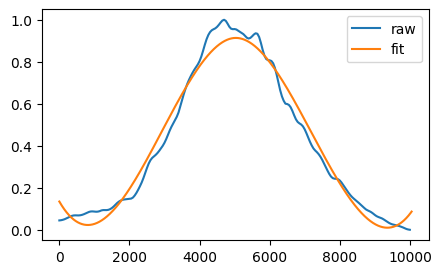

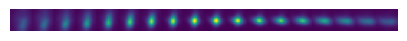

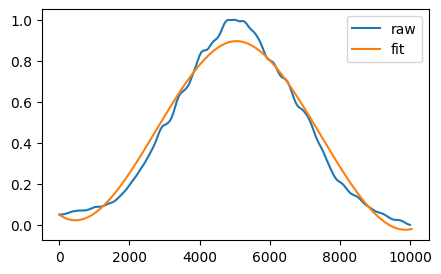



78it [00:07,  8.99it/s]

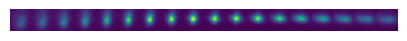

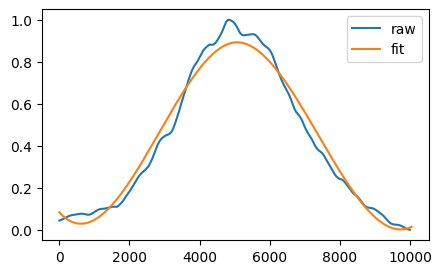

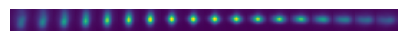

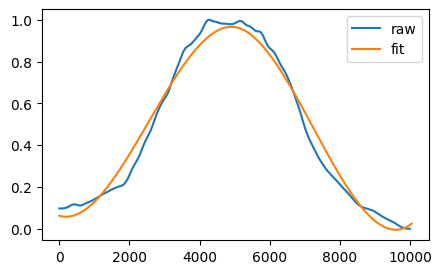



80it [00:07,  9.57it/s]

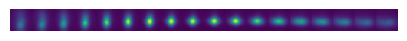

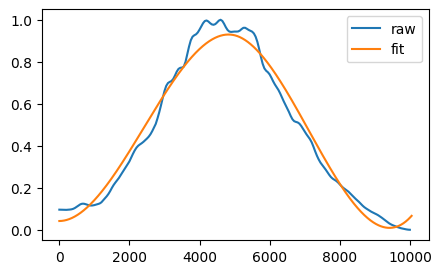

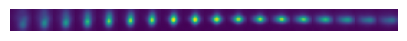

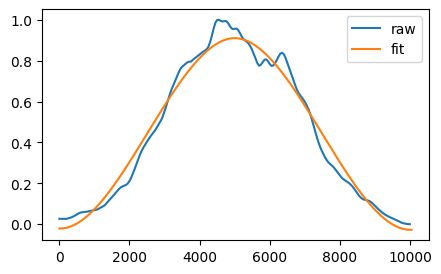



82it [00:07, 10.02it/s]

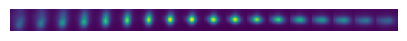

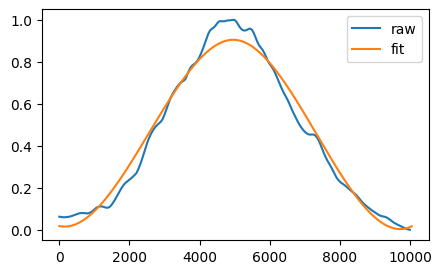

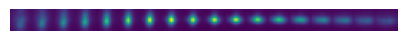

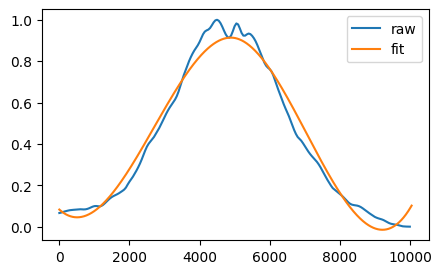



84it [00:07, 10.37it/s]

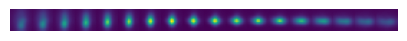

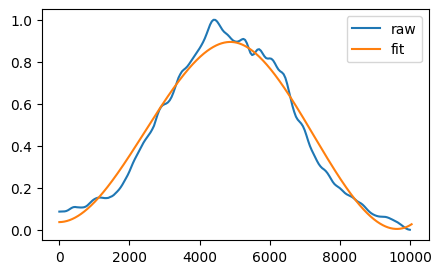

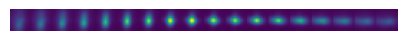

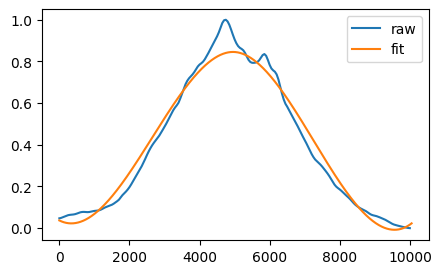



86it [00:08, 10.65it/s]

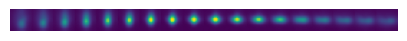

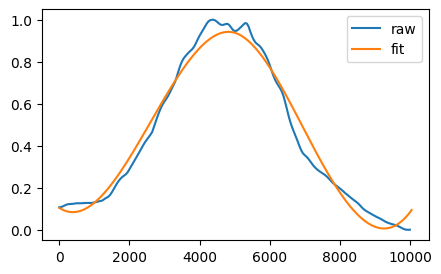

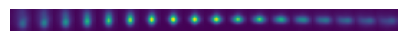

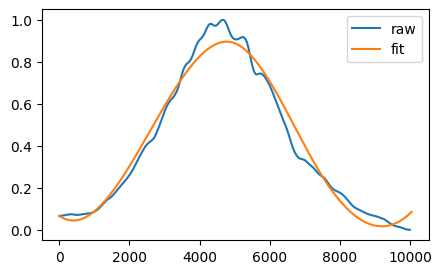



88it [00:08, 10.85it/s]

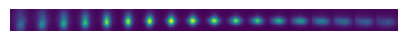

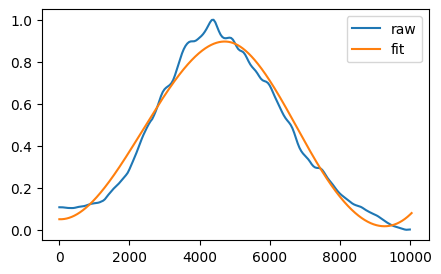

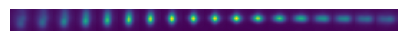

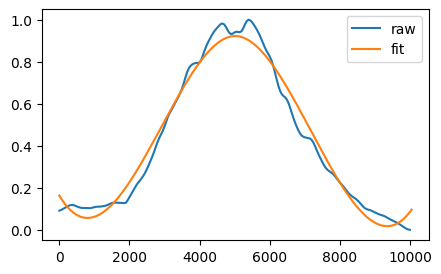



90it [00:08, 10.95it/s]

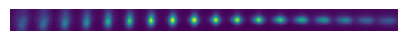

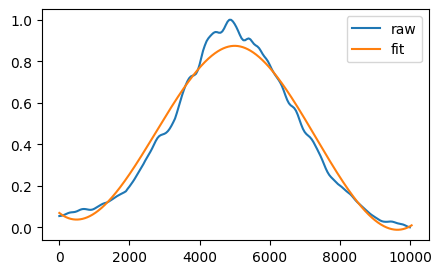

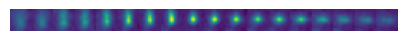

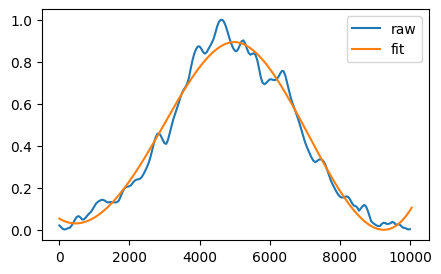



92it [00:08, 11.04it/s]

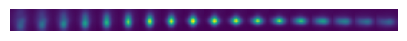

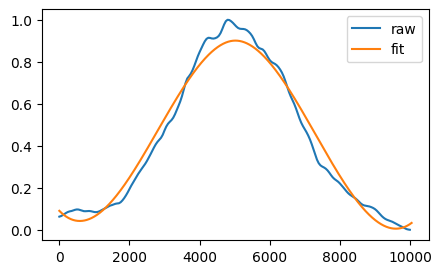

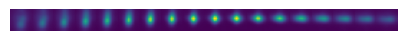

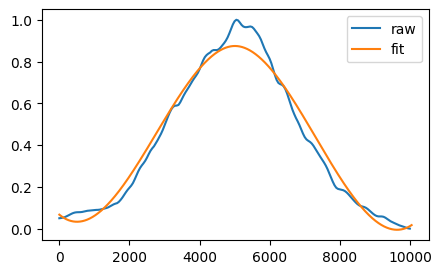



94it [00:08, 11.11it/s]

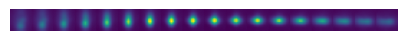

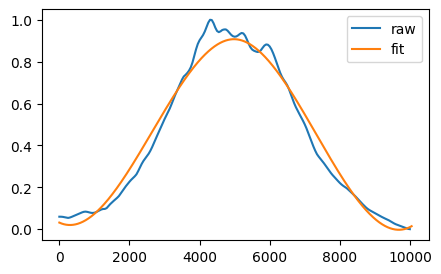

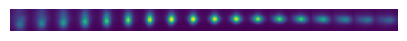

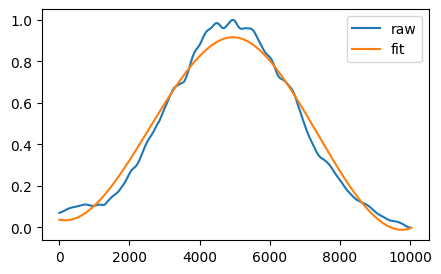



96it [00:08, 11.17it/s]

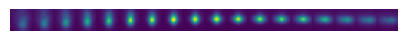

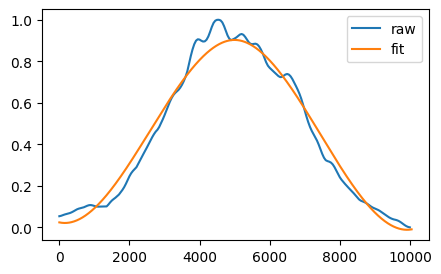

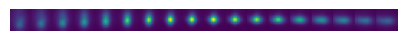

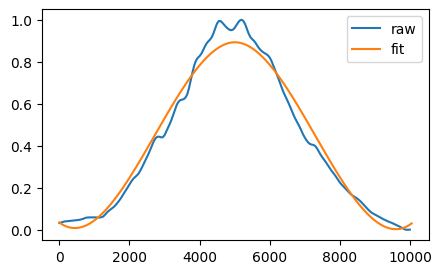



98it [00:09, 11.20it/s]

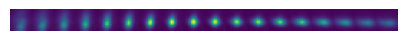

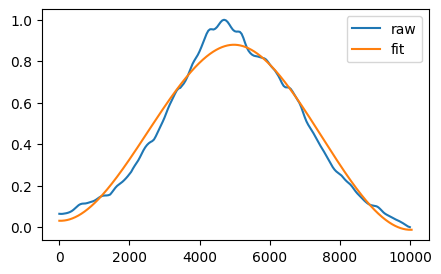

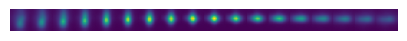

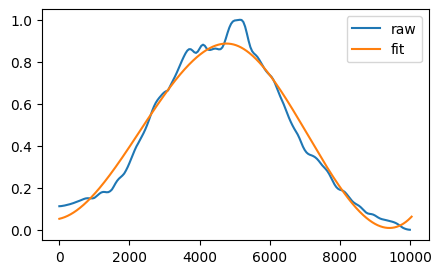



100it [00:09, 11.23it/s]

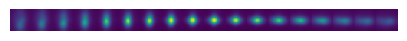

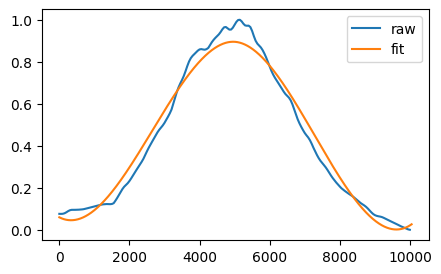

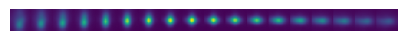

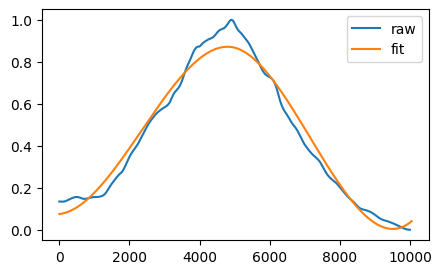



102it [00:09, 11.22it/s]

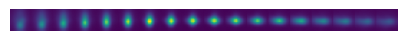

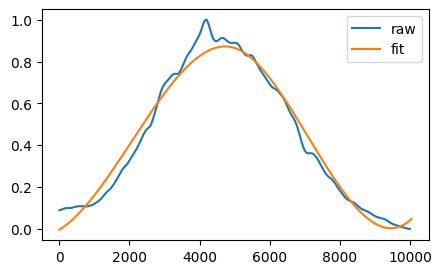

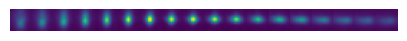

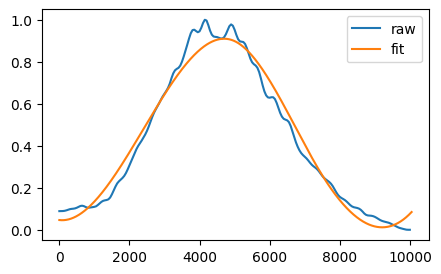



104it [00:09, 11.23it/s]

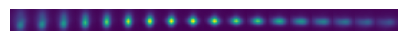

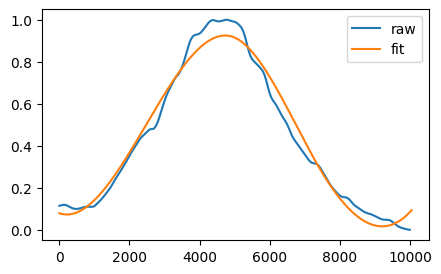

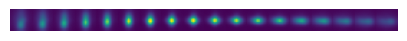

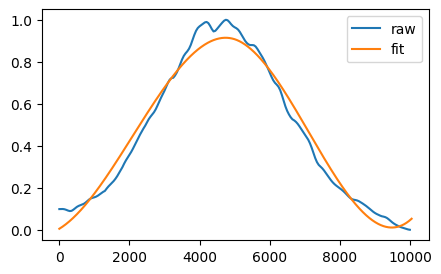



106it [00:10,  8.95it/s]

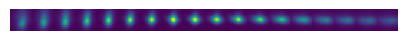

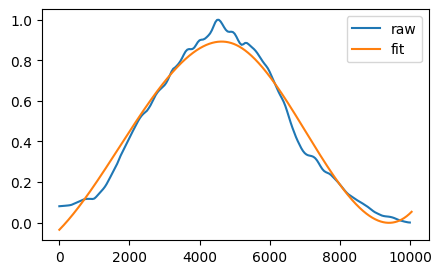

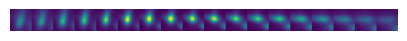

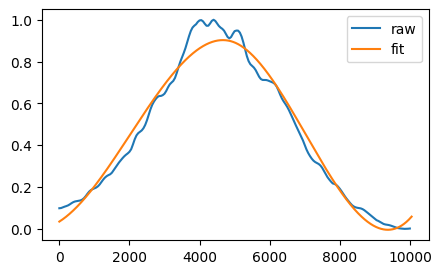



108it [00:10,  9.55it/s]

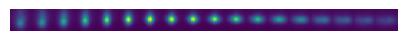

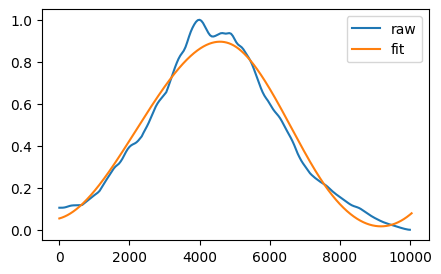

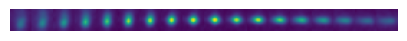

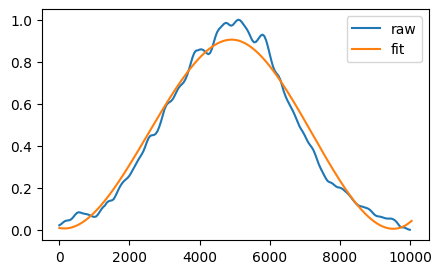



110it [00:10, 10.02it/s]

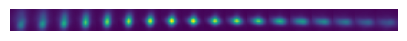

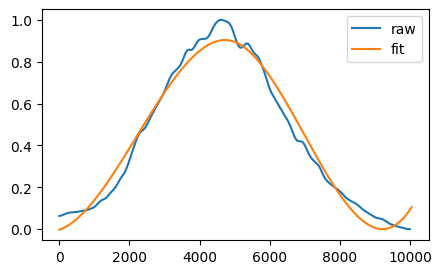

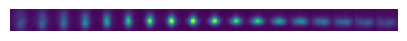


134it [00:31, 10.36it/s]

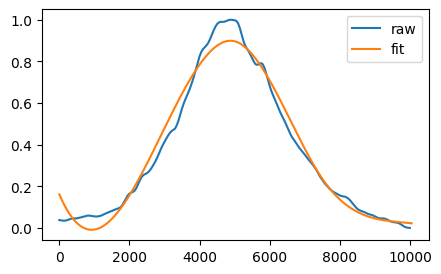



112it [00:10, 10.33it/s]

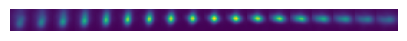

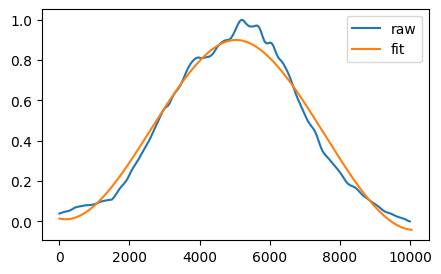

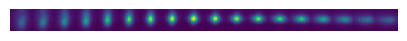

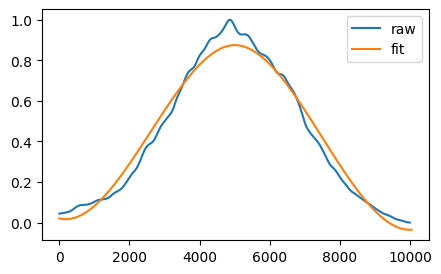



114it [00:10, 10.59it/s]

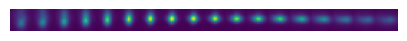

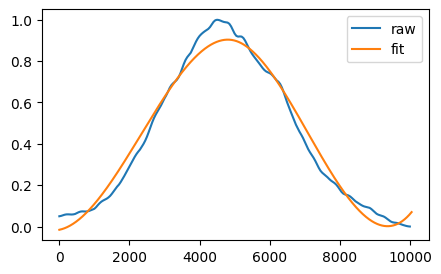

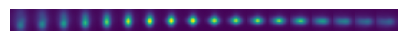

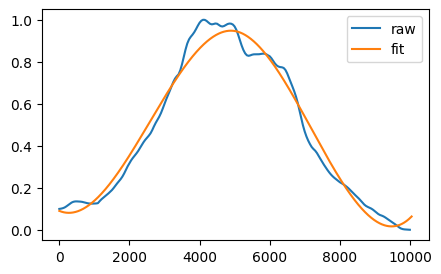



116it [00:10, 10.80it/s]

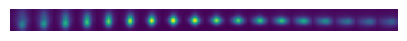

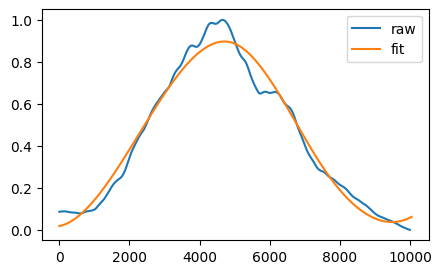

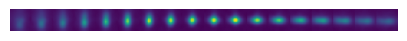

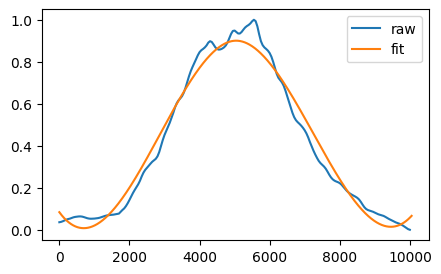



118it [00:11, 10.97it/s]

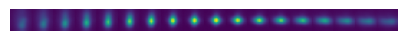

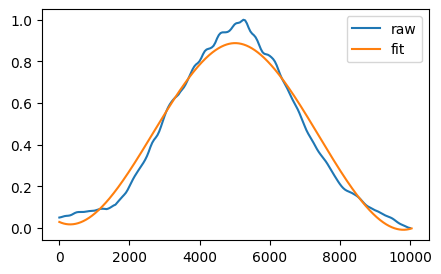

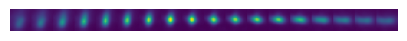

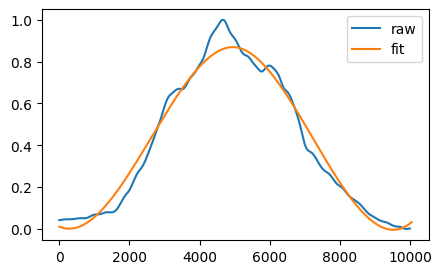



120it [00:11, 11.07it/s]

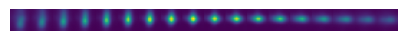

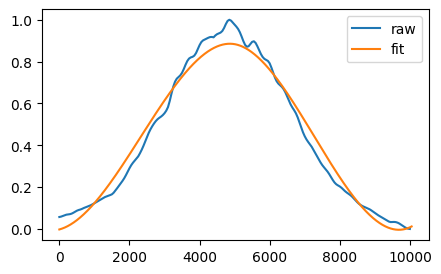

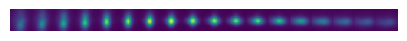

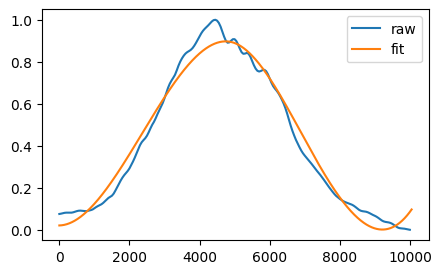



122it [00:11, 11.12it/s]

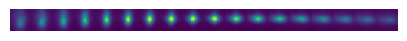

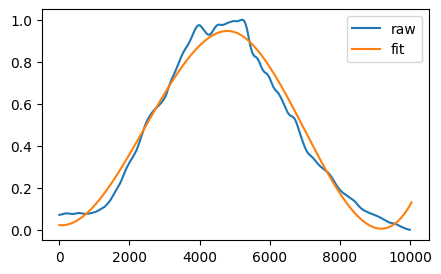

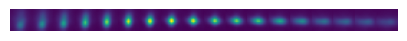

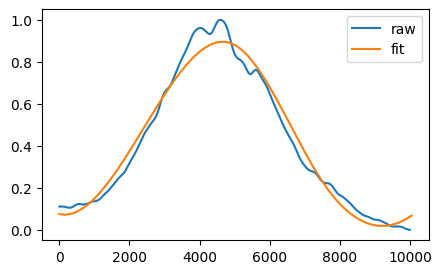



124it [00:11, 11.16it/s]

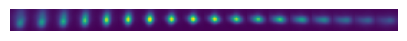

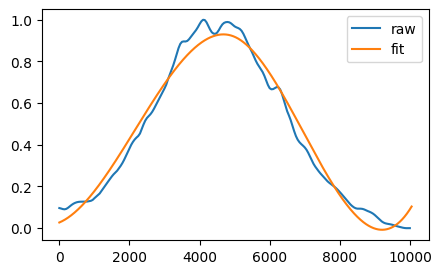

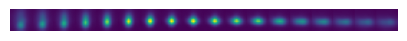

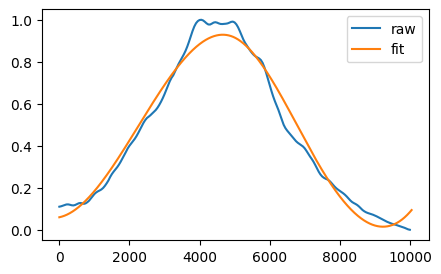



126it [00:11, 11.20it/s]

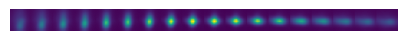

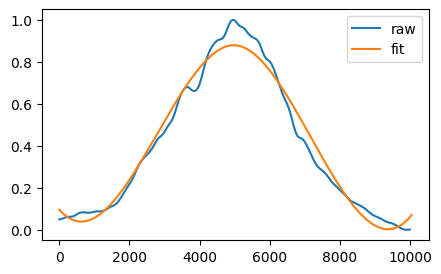

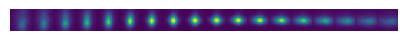

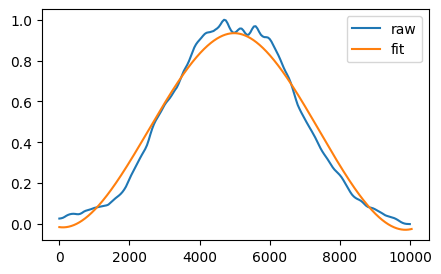



128it [00:11, 11.22it/s]

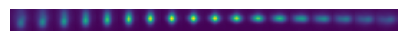

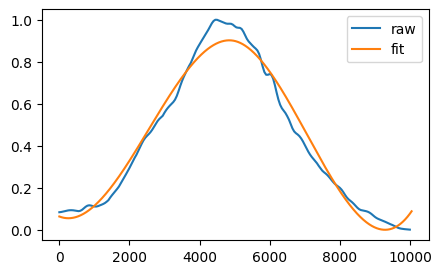

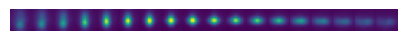

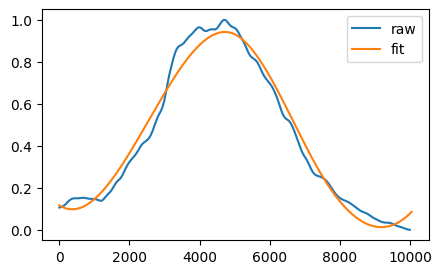



130it [00:12, 11.25it/s]

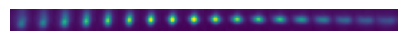

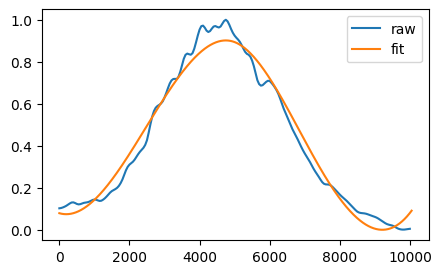

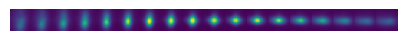

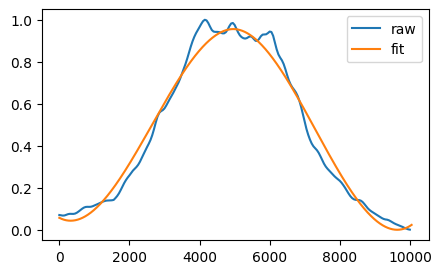



132it [00:12, 11.27it/s]

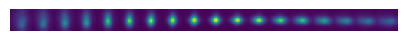

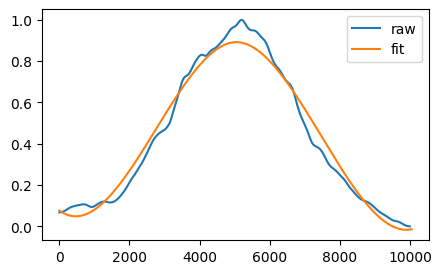

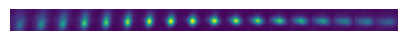

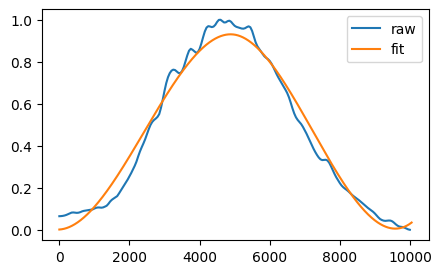



134it [00:12,  8.94it/s]

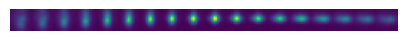

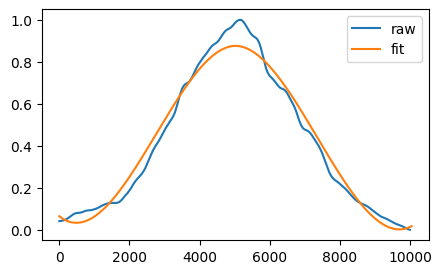

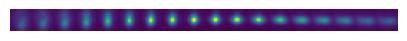

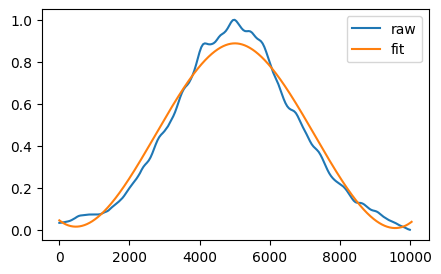



136it [00:12,  9.55it/s]

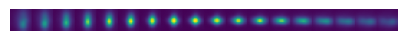

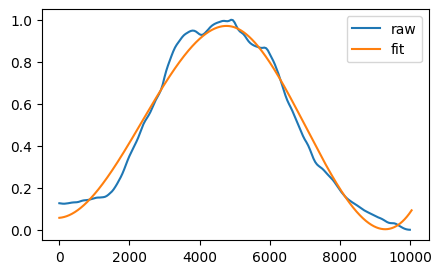

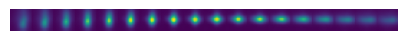

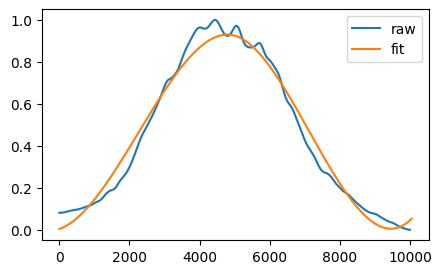



138it [00:13, 10.01it/s]

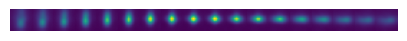

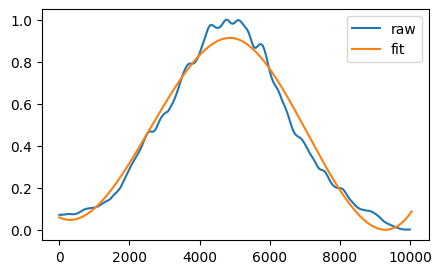

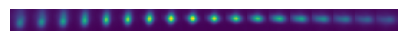

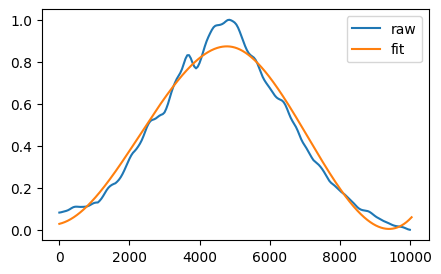



140it [00:13, 10.36it/s]

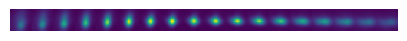

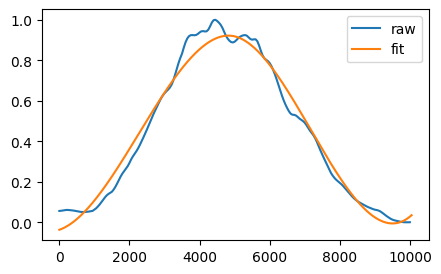

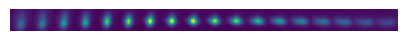

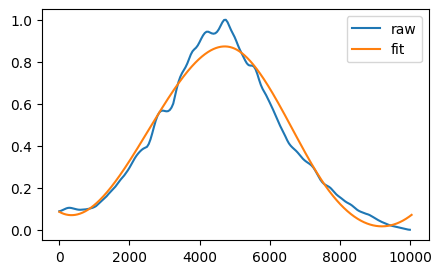



142it [00:13, 10.63it/s]

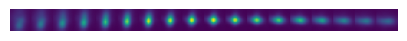

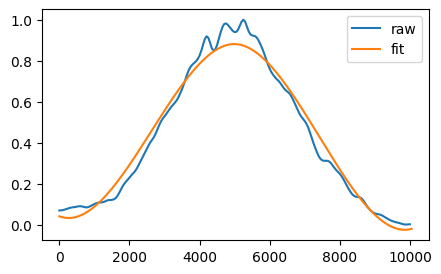

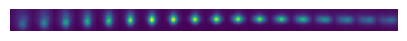

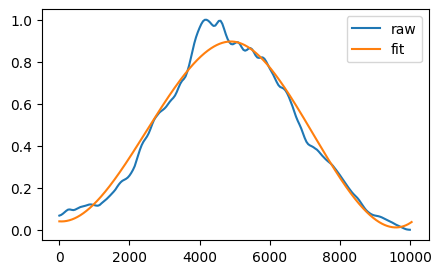



144it [00:13, 10.83it/s]

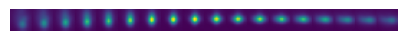

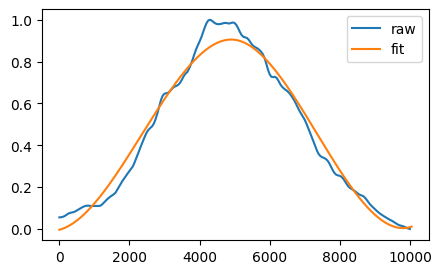

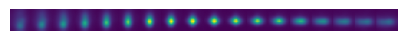

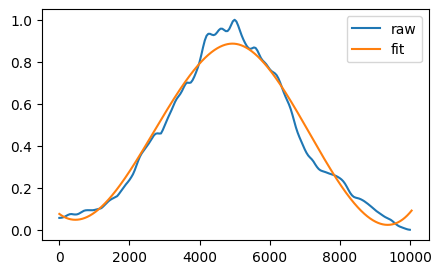



146it [00:13, 10.64it/s]


In [23]:
# Spline peak finding
from tqdm import tqdm
import numpy as np
Z_STEP = 50

from scipy.interpolate import UnivariateSpline
from data.align_psfs import norm_zero_one
from scipy import signal
import cv2
import numpy as np

plt.rcParams['figure.figsize'] = [5, 3]

DEBUG = True

UPSCALE_RATIO = 10

bad_psfs_idx = []

def denoise(img):
    from scipy.ndimage import gaussian_filter
    
    kernel_size = 2  # Adjust this based on the level of noise and your requirements

    return gaussian_filter(img, sigma=(2, 1, 1))
    

def find_peak(i, psf):
    if psf.ndim == 4:
        psf = psf.mean(axis=-1)
    x = np.arange(psf.shape[0]) * Z_STEP
    psf = denoise(psf)
    
    inten = norm_zero_one(psf.max(axis=(1,2)))

    cs = UnivariateSpline(x, inten, k=3, s=0.5)

    x_ups = np.linspace(0, psf.shape[0], len(x) * UPSCALE_RATIO) * Z_STEP

    peak_xups = x_ups[np.argmax(cs(x_ups))] 

    fit = cs(x_ups)
    
    peak = max(fit)
    low = min(fit)
    half_max = (peak - low) / 2
    
    peak_idx = np.argmax(fit)
    center_x = len(x_ups) / 2
    
    half_max_crossings = np.where(np.diff(np.sign(fit-half_max)))[0]
    if len(half_max_crossings) < 2:
        print(half_max_crossings)
        bad_psfs_idx.append(i)
        show_psf_axial(psf)
        plt.plot(x-peak, inten, label='raw')
        plt.plot(x_ups-peak, cs(x_ups), label='fit')
        plt.legend()
        plt.show()
    
    if DEBUG:
        show_psf_axial(psf)
        plt.plot(x-peak, inten, label='raw')
        plt.plot(x_ups-peak, cs(x_ups), label='fit')
        plt.legend()
        plt.show()
    return peak_xups

offsets = np.array([find_peak(i, psf) for i, psf in tqdm(enumerate(psfs))])

good_idx = [i for i in range(len(psfs)) if i not in bad_psfs_idx]

offsets = offsets[good_idx]
psfs = psfs[good_idx]
locs = locs.iloc[good_idx]


In [ ]:
for i, psf in enumerate(psfs):
    psf = psf.squeeze()
    plt.plot(norm_zero_one(psf.max(axis=(1,2))), label='vanilla')
    plt.plot(norm_zero_one(gaussian(psf, 2, channel_axis=0).max(axis=(1,2))), label='gauss-2d')
    plt.plot(norm_zero_one(gaussian(psf, 2).max(axis=(1,2))), label='gauss')
    plt.legend()
    plt.show()


In [ ]:
from skimage.filters import gaussian
from data.align_psfs import norm_zero_one

Z_STEP = 20
def norm_sum_imgs(psf):
    psf_sums = psf.sum(axis=(1,2, 3))
    psf = psf / psf_sums[:, np.newaxis, np.newaxis, np.newaxis]
    return psf

def eval_roll(fixed, moving, roll, debug=False):
    fixed_section = fixed
    moving_section = moving    
    if roll < 0:
        moving_section = moving[-roll:]
        fixed_section = fixed_section[:moving_section.shape[0]]
    elif roll > 0:
        fixed_section = fixed[roll:]
        moving_section = moving_section[:fixed_section.shape[0]]

    score = ((fixed_section-moving_section)**2).sum()
    if debug:
        plt.rcParams['figure.figsize'] = [10, 3]
        x = np.arange(fixed.shape[0])
        x_moving = np.arange(moving.shape[0]) + roll
        plt.title(f'full roll {roll}')
        plt.plot(x_moving, moving.max(axis=(1,2)), label='moving')
        plt.plot(x, fixed.max(axis=(1,2)), label='fixed')
        plt.xlim((-5, 200))
        plt.legend()
        plt.show()
        
        plt.title(f'{round(score, 2)} length {moving_section.shape[0]} roll {roll}')
        plt.plot(moving_section.max(axis=(1,2)), label='moving')
        plt.plot(fixed_section.max(axis=(1,2)), label='fixed')
        plt.legend()
        plt.show()   
        

        show_psf_axial(fixed.mean(axis=-1), 'fixed', 3)
        show_psf_axial(moving.mean(axis=-1), 'moving', 3)
        show_psf_axial(np.roll(moving.mean(axis=-1), roll, 0), f'shifted {roll}', 3)
        

    return score

def find_best_roll(fixed, moving):
    roll_min = -fixed.shape[0] // 2
    roll_max = fixed.shape[0] // 2
    best_roll = None
    min_score = np.inf
    
    rolls = []
    scores = []
    for roll in range(roll_min, roll_max, 1):
        score = eval_roll(fixed, moving, roll, debug=False)
        if score < min_score:
            best_roll = roll
            min_score = score
        rolls.append(roll)
        scores.append(score)
    plt.plot(rolls, scores)
    plt.xlabel('roll')
    plt.ylabel('MSE')
    plt.show()
    eval_roll(fixed, moving, best_roll, debug=True)
    return best_roll * Z_STEP
        


psf1 = norm_zero_one(gaussian(psfs[1]).copy())

psf2 = norm_zero_one(gaussian(psfs[3]).copy())

roll = find_best_roll(psf1, psf2)

# z = np.arange(psf1.shape[0]) * Z_STEP
# z2 = z - roll

# zs = np.concatenate((z, z2))
# psf = np.concatenate((psf1, psf2))
# idx = np.argsort(zs)
# psf = psf[idx]
# plt.imshow(grid_psfs(psf.squeeze()))
# plt.show()



In [ ]:
mean_psf = psfs.mean(axis=0)
plt.imshow(grid_psfs(mean_psf.squeeze()))
plt.show()
plt.imshow(grid_psfs(psfs[0].squeeze()))

In [ ]:
import SimpleITK as sitk
import numpy as np
from data.align_psfs import norm_zero_one
import pandas as pd
from sklearn.metrics import euclidean_distances

Z_STEP = 20 
def command_iteration(method):
    print(
        f"{method.GetOptimizerIteration():3} "
        + f" = {method.GetMetricValue():7.5f} "
        + f" : {method.GetOptimizerPosition()}"
    )        

def arr_to_img(arr):
    arr = norm_zero_one(arr.squeeze()).astype(np.float32)
    img = sitk.GetImageFromArray(arr)
    img = sitk.DiscreteGaussian(img)
    return img


def register_psf(psf, fixed):
    moving = arr_to_img(psf)

    R = sitk.ImageRegistrationMethod()

    R.SetMetricAsMeanSquares()

    R.SetOptimizerAsRegularStepGradientDescent(
        learningRate=0.05,
        minStep=1e-12,
        numberOfIterations=10000,
        gradientMagnitudeTolerance=1e-12,
    )
    R.SetOptimizerScalesFromIndexShift()

    R.SetInitialTransform(sitk.TranslationTransform(fixed.GetDimension()))

    R.SetInterpolator(sitk.sitkLinear)

#     R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

    outTx = R.Execute(fixed, moving)
    print("-------")
    print(outTx)
    print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
    print(f" Iteration: {R.GetOptimizerIteration()}")
    print(f" Metric value: {R.GetMetricValue()}")

    return outTx.GetOffset()[2] * Z_STEP


def find_seed_psf(df):
    # Seed PSF - most centered PSF in FOV
    center = df[['x', 'y']].mean(axis=0).to_numpy()
    coords = df[['x', 'y']].to_numpy()
    dists = euclidean_distances([center], coords).squeeze()
    first_point = np.argmin(dists)
    return first_point

def register_psfs(psfs, coords):
    offsets = []
    df = pd.DataFrame(coords[:, 0], columns=['x', 'y'])
    seed_idx = find_seed_psf(df)
    
    ref = arr_to_img(psfs[seed_idx])

    for i in range(psfs.shape[0]):
        if i == seed_idx:
            offset = 0
        else:
            offset = register_psf(psfs[i], ref)
        offsets.append(offset)
    return offsets


i = 0
i2 = 10
offset = register_psf(psfs[0], arr_to_img(psfs[i2]))

plt.rcParams['figure.figsize'] = [10, 3]
x = np.arange(psfs.shape[1]) * Z_STEP
plt.plot(x, psfs[i].std(axis=(1,2)))
plt.plot(x+offset, psfs[i2].std(axis=(1,2)))
plt.show()



In [ ]:
from data.visualise import grid_psfs
plt.rcParams['figure.figsize'] = [10, 10]

fig, axs = plt.subplots(nrows=1, ncols=2)
zs1 = np.arange(psfs[i].shape[0])*Z_STEP
zs2 = (np.arange(psfs[i2].shape[0])*Z_STEP)

zs = np.concatenate((zs1, zs2))
imgs = np.concatenate((psfs[i], psfs[i2]))
idx = np.argsort(zs)
imgs = imgs[idx]
axs[0].imshow(grid_psfs(imgs))


zs1 = np.arange(psfs[i].shape[0])*Z_STEP
zs2 = (np.arange(psfs[i2].shape[0])*Z_STEP) + offset

zs = np.concatenate((zs1, zs2))
imgs = np.concatenate((psfs[i], psfs[i2]))
idx = np.argsort(zs)
imgs = imgs[idx]
axs[1].imshow(grid_psfs(imgs))



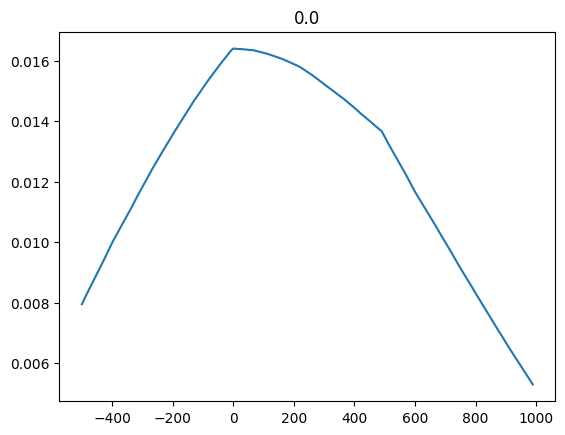

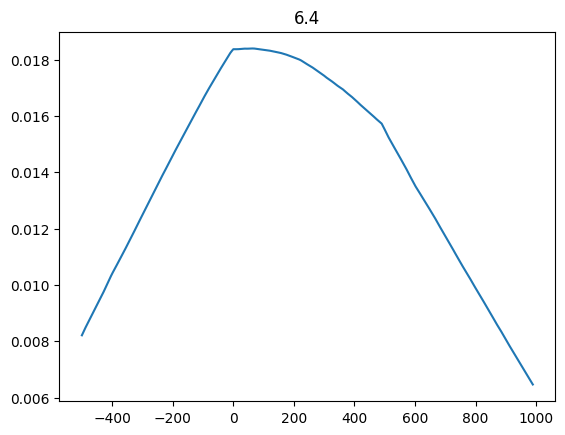

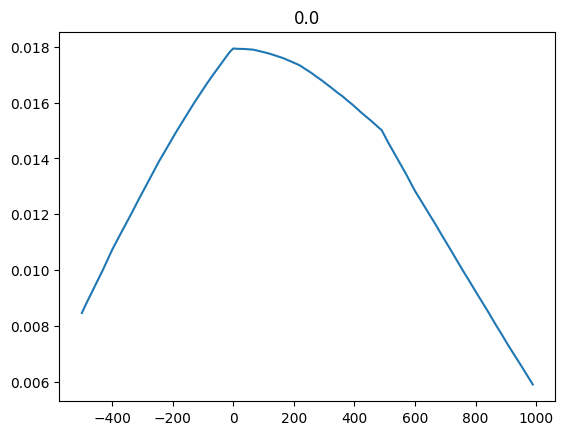

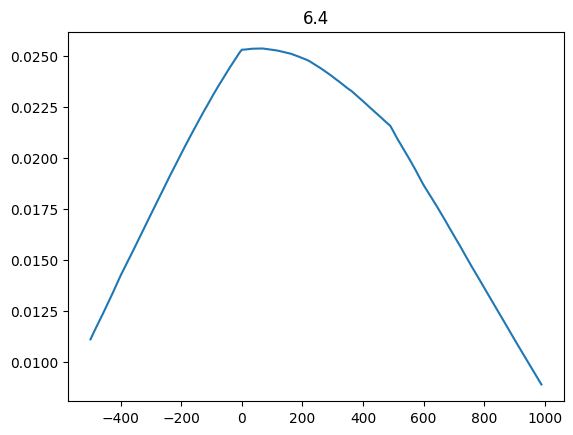

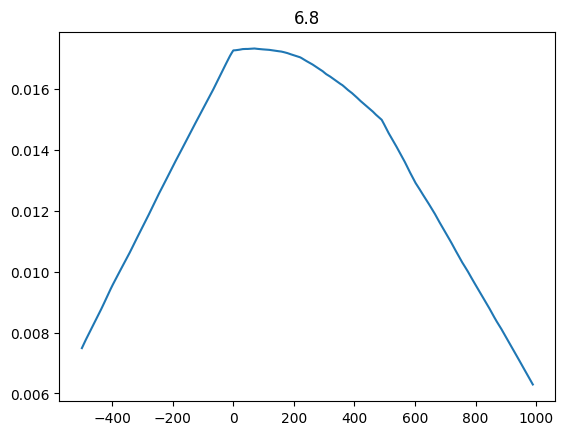

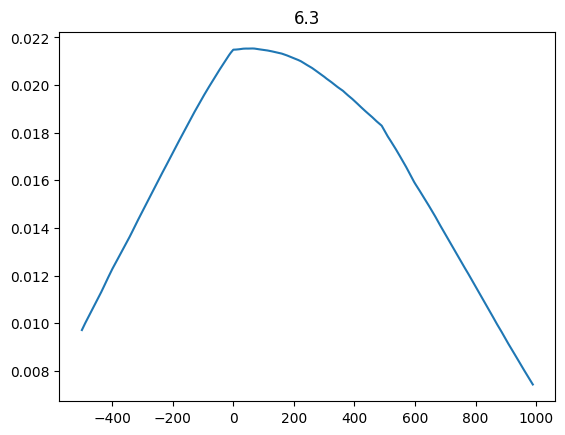

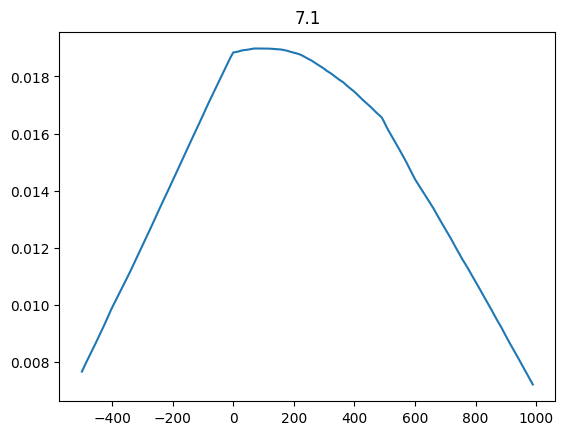

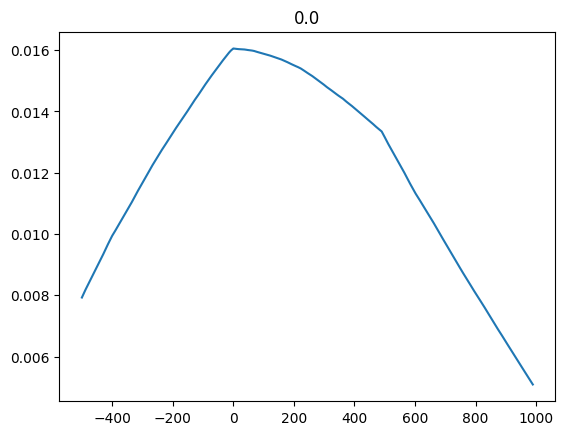

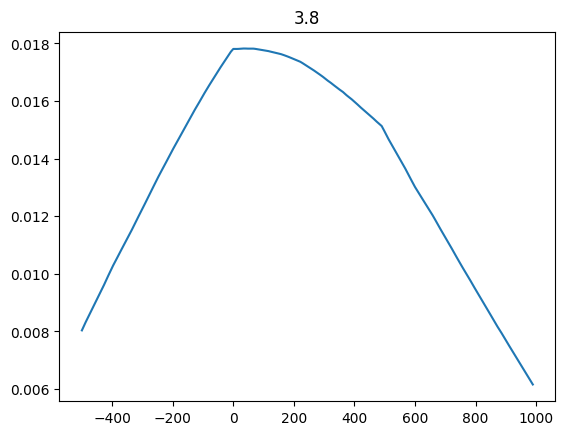

In [32]:
from scipy.signal import correlate, correlation_lags
from skimage.filters import gaussian
from scipy import ndimage as ndi
UPSCALE_RATIO = 10

def preprocess_psf(psf):
    out = ndi.zoom(gaussian(psf), (UPSCALE_RATIO, 1, 1), order=2)
    return out.max(axis=(1,2))

psf1 = psfs[0].squeeze()
psf1 = preprocess_psf(psf1)
mode = 'same'
for i in range(1, 10):
    psf2 = psfs[i].squeeze()[0:100]
    s2 = preprocess_psf(psf2)

    lags = correlation_lags(len(s1), len(s2), mode=mode)
    corr = correlate(s1, s2, mode=mode)
    shift = lags[np.argmax(corr)] / UPSCALE_RATIO
    
    plt.title(str(shift))
    plt.plot(lags, corr)
    plt.show()


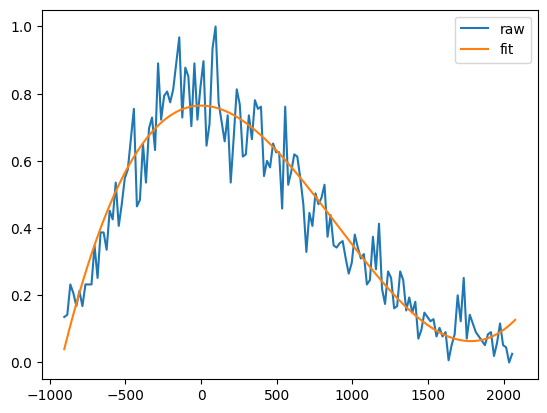

In [99]:
from scipy.interpolate import UnivariateSpline
from data.align_psfs import norm_zero_one

UPSCALE_RATIO = 10
Z_STEP = 20

def find_peak(psf):
    x = np.arange(psf.shape[0]) * Z_STEP
    inten = norm_zero_one(psf.max(axis=(1,2)))
    cs = UnivariateSpline(x, inten, k=3, s=1)

    x_ups = np.linspace(0, psf.shape[0], len(x) * UPSCALE_RATIO) * Z_STEP
    


    peak = x_ups[np.argmax(cs(x_ups))] 
    
    plt.plot(x-peak, inten, label='raw')
    plt.plot(x_ups-peak, cs(x_ups), label='fit')
    plt.legend()
    plt.show()
    return peak

peak = find_peak(psfs[1])



